In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

In [ ]:
# Step 1: Load and Prepare Data (MNIST dataset)
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
# Step 3: Build the Denoising Autoencoder Model
input_img = Input(shape=(28, 28, 1))

In [ ]:
# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [ ]:

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Step 4: Train the Model
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 134s 280ms/step - loss: 0.2321 - val_loss: 0.1160
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 278ms/step - loss: 0.1142 - val_loss: 0.1072
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 280ms/step - loss: 0.1070 - val_loss: 0.1038
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 280ms/step - loss: 0.1043 - val_loss: 0.1023
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 275ms/step - loss: 0.1030 - val_loss: 0.1008
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 279ms/step - loss: 0.1017 - val_loss: 0.0995
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 280ms/step - loss: 0.1001 - val_loss: 0.0987
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 137s 291ms/step - loss: 0.0991 - val_loss: 0.0984
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 137s 282ms/step - loss: 0.0987 - val_loss: 0.0973
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 284ms/step - loss: 0.0979 - val_loss: 0.0972


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


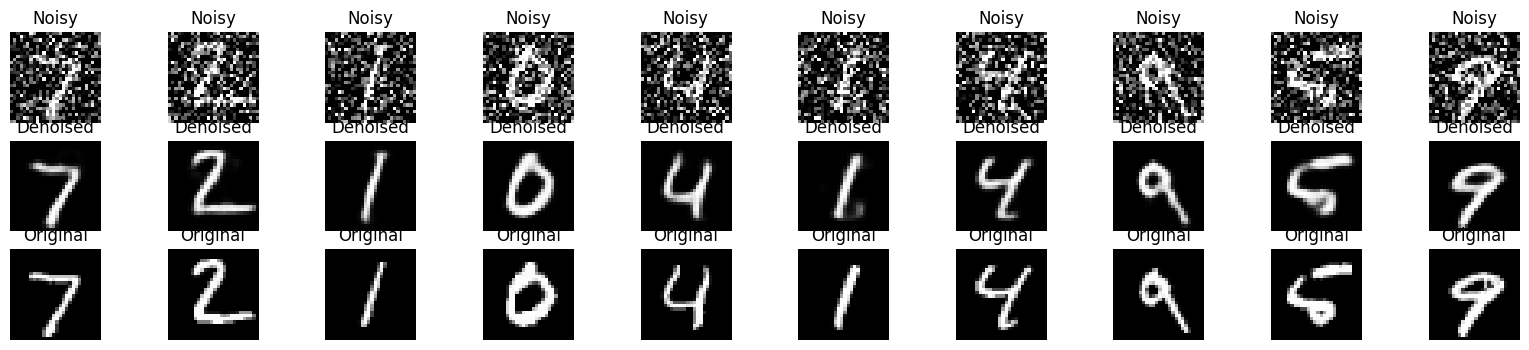

In [ ]:
# Step 5: Visualize Results
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
plt.show()

In [ ]:
# Step 6: Evaluate with PSNR
def calculate_psnr(clean_images, denoised_images):
    psnr_values = [psnr(clean, denoised) for clean, denoised in zip(clean_images, denoised_images)]
    return np.mean(psnr_values)

# Calculate PSNR
average_psnr = calculate_psnr(x_test, decoded_imgs)
print("Average PSNR:", average_psnr)

Average PSNR: 19.757721917277408
